In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
!ls "/content/drive/My Drive/stats302_image_recognition"

In [ ]:
folder_path = '/content/drive/My Drive/stats302_image_recognition'

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def resize_and_pad(img, size, pad_color=0):
    h, w = img.shape[:2] #shape parametrs
    sh, sw = size #image size parameters

    if h > sh or w > sw:
        interp = cv2.INTER_AREA #do we decide to shrink image
    else:
        interp = cv2.INTER_CUBIC #or do we decide to enlarge the image?

    aspect = w / h #aspect ratio

#padding calculation begins here
#we calculate new width and new height with variables: new_w and new_h
    if aspect > 1:
        new_w = sw
        new_h = np.round(new_w / aspect).astype(int)
        pad_vert = (sh - new_h) // 2
        pad_top, pad_bot = pad_vert, pad_vert
        pad_left, pad_right = 0, 0
    elif aspect < 1:
        new_h = sh
        new_w = np.round(new_h * aspect).astype(int)
        pad_horz = (sw - new_w) // 2
        pad_left, pad_right = pad_horz, pad_horz
        pad_top, pad_bot = 0, 0
    else:
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

#padding logic remains to be understood but I get the purpose is to

    if len(img.shape) == 3 and not isinstance(pad_color, (list, tuple, np.ndarray)):
        pad_color = [pad_color] * 3

    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right,
                                    borderType=cv2.BORDER_CONSTANT, value=pad_color)

    return scaled_img

#scaled imaged is resized and padded, converted into numpy array

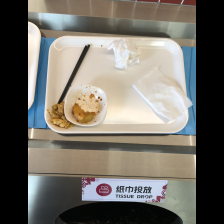

In [ ]:
# Test the function on one image
test_image_path = '/content/drive/My Drive/stats302_image_recognition/IMG_0249.jpeg'
image = cv2.imread(test_image_path)
resized_padded_image = resize_and_pad(image, (224, 224)) #resize the image into 224x224 desired dimensions

if resized_padded_image is not None:
    cv2_imshow(resized_padded_image) #simply display the resize and padded image
else:
    print("The resize_and_pad function returned None")


In [ ]:
def process_images_from_directory(directory_path, target_size=(224, 224)):
    processed_images = [] #we hold processed images here
    directory_path = '/content/drive/My Drive/stats302_image_recognition'
    for filename in os.listdir(directory_path): #we iterate over all images in the directory_path
        if filename.lower().endswith((".jpeg")): #check image file extension label
            image_path = os.path.join(directory_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                resized_padded_image = resize_and_pad(image, target_size) #helper function to resize and pad the images
                processed_images.append(resized_padded_image) #append all the resized images into processed_images
            else:
                print(f"Image {filename} not found or unable to read.")
    return processed_images

#this code block iterates over the entire directory and simply rurns resize_repad helper function on each img

folder_path = '/content/drive/My Drive/processed_images'
processed_images = process_images_from_directory(folder_path)

if processed_images:
    display_image = processed_images[0].astype(np.uint8)
    cv2_imshow(display_image)
else:
    print("No images were processed.")
    


KeyboardInterrupt: 

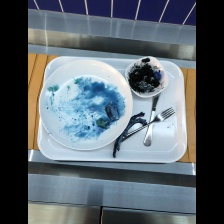

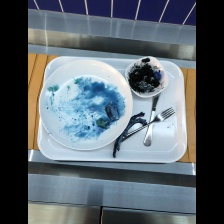

In [ ]:
#josh's code block: iterates over each raw photo, from original directory
#populates processed_images folder in my google drive

import os
import cv2
import numpy as np

# Define the path to the raw data source
raw_data_path = '/content/drive/MyDrive/stats302_image_recognition'
# Define the path where the processed images will be saved
processed_images_path = '/content/drive/MyDrive/processed_images'

#i made some slight changes to coco's helper code
# Function to process images from one directory and save them to another directory
def process_and_save_images_from_directory(raw_directory, processed_directory, target_size=(224, 224)):
    if not os.path.exists(processed_directory):
        os.makedirs(processed_directory)

    for filename in os.listdir(raw_directory):
        if filename.lower().endswith((".jpeg")):
            raw_image_path = os.path.join(raw_directory, filename)
            processed_image_path = os.path.join(processed_directory, filename)

            image = cv2.imread(raw_image_path)
            if image is not None:
                resized_padded_image = resize_and_pad(image, target_size)
                # Save the processed image to the new directory
                cv2.imwrite(processed_image_path, resized_padded_image)
            else:
                print(f"Image {filename} not found or unable to read.")

# Process the images and save them to the 'processed_images' directory
process_and_save_images_from_directory(raw_data_path, processed_images_path)

# Check if the processed directory has images
if len(os.listdir(processed_images_path)) > 0:
    first_image_filename = os.listdir(processed_images_path)[0]
    first_image_path = os.path.join(processed_images_path, first_image_filename)
    display_image = cv2.imread(first_image_path)
    if display_image is not None:
        # Convert the image to RGB for correct color representation
        display_image = cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB)
        cv2_imshow(display_image)
    else:
        print("No images were processed or display failed.")
else:
    print("No images were processed.")




In [ ]:
#comment: coco's code sources from processed_images as a variable,
#i tweak it so that it sources from the drive directory directly

#coco old code block:
#______________________________________________________________
# import matplotlib.pyplot as plt

# def show_processed_images(processed_images, num_images=5):
#     plt.figure(figsize=(20, 10))
#     for i in range(min(num_images, len(processed_images))):
#         ax = plt.subplot(1, num_images, i + 1)
#         plt.imshow(processed_images[i])
#         plt.title(f"Image {i+1}")
#         plt.axis("off")
#     plt.show()

# show_processed_images(processed_images)
#______________________________________________________________


#josh updated code block:
#______________________________________________________________
#path of processed images:
processed_images_path = '/content/drive/MyDrive/processed_images'
def show_processed_images_from_directory(directory_path, num_images=10):
    # Retrieve from directory
    image_files = [img for img in os.listdir(directory_path) if img.lower().endswith(('.jpeg'))]
    image_files = sorted(image_files)[:num_images]

    # Figure setup for displaying images
    plt.figure(figsize=(20, 20))
    for i, img_name in enumerate(image_files):
        img_path = os.path.join(directory_path, img_name)
        img = cv2.imread(img_path)

        ax = plt.subplot(1, num_images, i + 1)
        ax.imshow(img)
        ax.set_title(f"Image {i+1}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_processed_images_from_directory(processed_images_path)
#______________________________________________________________



##CNN model implementaton;
We don't have 'before' photos so we train resnet on an open dataset of Chinese food. This is ground truth

**Helpful links:**
https://medium.com/@onur_andros_ozbek/food-101-classifier-using-resnet50-on-colab-f0cc6ac6487 (training resnet on food classifier)
https://data.mendeley.com/datasets/fspyss5zbb/1 (dataset)
https://www.aboutdatablog.com/post/how-to-successfully-add-large-data-sets-to-google-drive-and-use-them-in-google-colab (uploading dataset into google drive, and accessing)

**Input:** The model takes an input image with dimensions 600x600 pixels.

**ResNet-50 Feature Extraction:** ResNet-50 is used as a feature extractor, processing the image through its convolutional and residual layers.

**Global Average Pooling:** The output feature maps from ResNet-50 are condensed into a smaller set of values using global average pooling.

**Dense Layer:** A fully connected dense layer with 1024 neurons follows, using ReLU (Rectified Linear Unit) activation function to introduce non-linearity.

**Output Layer:** The final dense layer consists of 240 neurons (if there are 240 classes to classify) with a softmax activation function, which outputs the probabilities for each class.

**Training:**The model is trained on a custom dataset, adjusting its weights to minimize the loss function, which measures the difference between the predicted and true labels.

**Prediction:** After training, the model can take a new image, process it through these layers, and predict the class label, completing the flow from raw data to an actionable result.

In [ ]:
#unzip the files first
!unzip /content/drive/MyDrive/Dataset/validation.zip

In [ ]:
# !unzip -u /content/drive/MyDrive/dataset/train.zip -d /content/drive/MyDrive/dataset/train_folder
# we unzip partially to 2gb
# After the reset, let's redefine the essential parts of the code for the hypothetical example of partially unzipping a file.

from zipfile import ZipFile
import os


def unzip_equal_photos(zip_path, extract_to_path, total_size_gb=3, folder_count=157):
    """
    Unzips an equal amount of photos from each folder in the zip archive,
    aiming for a total extracted size of total_size_gb across all folders.
    """
    # Ensure the target directory exists

    size_limit_bytes_per_folder = (total_size_gb * 1024**3) / folder_count  # Divide the total limit by the number of folders

    with ZipFile(zip_path, 'r') as zip_ref:
        folder_sizes = {f"{i:03}": 0 for i in range(folder_count)}  # Initialize folder sizes
        for file_info in sorted(zip_ref.infolist(), key=lambda x: x.filename):
            folder_name = file_info.filename.split('/')[0]  # Assuming folder name is the first part of the path
            if folder_name.isdigit() and int(folder_name) < folder_count:  # Check if the folder name is within the expected range
                if folder_sizes[folder_name] + file_info.file_size <= size_limit_bytes_per_folder:
                    zip_ref.extract(file_info, extract_to_path)  # Extract file
                    folder_sizes[folder_name] += file_info.file_size
                else:
                    continue  # Skip to the next file if the current folder's limit is reached

    # Calculate and return the total size of extracted files in GB
    total_extracted_size_bytes = sum(folder_sizes.values())
    return total_extracted_size_bytes / 1024**3

# Example usage
zip_path = '/content/drive/MyDrive/Dataset/train.zip'  # Path to your zip file
extract_to_path = '/content/drive/MyDrive/Dataset/train_folder'  # Target directory for extraction

# Extract data (uncomment the line below to use)
total_extracted_size_gb = unzip_equal_photos(zip_path, extract_to_path)
print(f"Total extracted size: {total_extracted_size_gb} GB")


Total extracted size: 2.8530020769685507 GB


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Setup train and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train_folder',  # Update to your training directory path
    target_size=(600, 600),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Validation',  # Validation directory path
    target_size=(600, 600),
    batch_size=32,
    class_mode='categorical')

# Load and customize ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(600, 600, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(157, activation='softmax')(x)  # Adjusted to 157 classes in your dataset
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Number of epochs to train for
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)


Found 46429 images belonging to 136 classes.
Found 11291 images belonging to 157 classes.
Epoch 1/10


NameError: name 'gc' is not defined